In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [145]:
df = pd.read_csv("heart.csv")

In [146]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [147]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [148]:
# Checking for null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [149]:
# le = LabelEncoder()
# # df["ST_Slope"] = le.fit_transform(df["ST_Slope"])
# # df["Sex"] = le.fit_transform(df["Sex"])
# df["ExerciseAngina"] = le.fit_transform(df["ExerciseAngina"])
# df["RestingECG"] = le.fit_transform(df["RestingECG"])
# df["ChestPainType"] = le.fit_transform(df["ChestPainType"])

In [150]:
male_female_cols=["Sex"]
for cols in male_female_cols:
        df[cols] = df[cols].map({
            'M' : 1, 
            'F'  : 0
        })

In [151]:
slope=["ST_Slope"]
for cols in slope:
    df[cols] = df[cols].map({
            'Up' : 1, 
            'Flat'  : 0,
            'Down' : 2
        })

In [152]:
excer=["ExerciseAngina"]
for cols in excer:
        df[cols] = df[cols].map({
            'Y' : 1, 
            'N'  : 0
        })

In [153]:
chest=["ChestPainType"]
for cols in chest:
        df[cols] = df[cols].map({
            'TA' : 1, 
            'ATA'  : 0,
            'NAP':2,
            'ASY':3
        })

In [154]:
rest=["RestingECG"]
for cols in rest:
    df[cols] = df[cols].map({
            'Normal' : 1, 
            'ST'  : 0,
            'LVH' : 2
        })

In [155]:
# scaler = MinMaxScaler()
# df[["Cholesterol", "RestingBP", "MaxHR"]] = scaler.fit_transform(df[["Cholesterol", "RestingBP", "MaxHR"]])

In [156]:
X_train, X_test = train_test_split(df, test_size=0.2)
y_test = X_test["HeartDisease"]
y_train = X_train["HeartDisease"]
X_test.drop(["HeartDisease"], axis=1, inplace=True)
X_train.drop(["HeartDisease"], axis=1, inplace=True)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

C:\Users\neera\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [157]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,44,1,2,120,226,0,1,169,0,0.0,1
1,55,1,3,120,0,0,0,92,0,0.3,1
2,60,1,3,136,195,0,1,126,0,0.3,1
3,56,1,3,140,0,1,1,121,1,1.8,1
4,44,1,0,130,219,0,2,188,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
729,54,1,2,120,217,0,1,137,0,0.0,1
730,43,0,2,122,213,0,1,165,0,0.2,0
731,44,1,3,135,491,0,1,135,0,0.0,0
732,53,1,2,160,0,1,2,122,1,0.0,0


In [158]:
y_train

0      0
1      1
2      0
3      1
4      0
      ..
729    0
730    0
731    1
732    1
733    0
Name: HeartDisease, Length: 734, dtype: int64

C:\Users\neera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The number of heart failures between males and females.')

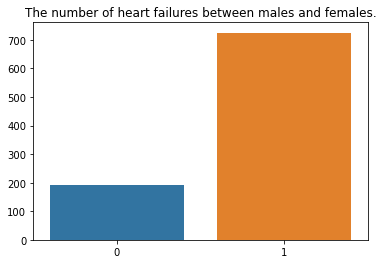

In [159]:
heartdisease_count_by_sex = df.groupby("Sex").HeartDisease.count().to_dict()
sns.barplot(list(heartdisease_count_by_sex.keys()), list(heartdisease_count_by_sex.values()))
plt.title("The number of heart failures between males and females.")

In [160]:
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [161]:
scores = cross_val_score(model, X_test, y_test, cv=10)
scores

array([0.89473684, 0.89473684, 1.        , 0.78947368, 0.88888889,
       0.83333333, 0.94444444, 0.94444444, 0.88888889, 0.88888889])

In [162]:
average_score = np.mean(scores)

In [163]:
import pickle

In [164]:
with open('heart_fail.pkl', 'wb') as f:
    pickle.dump(model, f)

In [165]:
with open('heart_fail.pkl', 'rb') as f:
    model = pickle.load(f)

In [166]:
X_train.iloc[5]

Age                48.0
Sex                 0.0
ChestPainType       0.0
RestingBP         120.0
Cholesterol       284.0
FastingBS           0.0
RestingECG          1.0
MaxHR             120.0
ExerciseAngina      0.0
Oldpeak             0.0
ST_Slope            1.0
Name: 5, dtype: float64

In [167]:
x=np.array([X_train.iloc[5]])

In [168]:
print(x)

[[ 48.   0.   0. 120. 284.   0.   1. 120.   0.   0.   1.]]


In [169]:
model.predict(x)

array([0], dtype=int64)